In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('KAG_conversion_data.csv')
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


In [3]:
df.isnull().sum()   

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [5]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [6]:
dt=df['gender'].value_counts().reset_index()
dt.columns=['gender','count']
fig=px.pie(dt,values='count',names='gender',title='Gender Distribution',color_discrete_sequence=px.colors.sequential.RdBu,hole=0.5,template='plotly_dark',width=500,height=500)
fig.show()

In [7]:
data=df.groupby(by=('xyz_campaign_id'))['Clicks'].count()
fig=px.pie(df,values=data,names=data.index,title='xyz_campaign_id',color_discrete_sequence=px.colors.sequential.RdBu,hole=0.5,opacity=0.8,hover_data=[data.index],labels={'index':'xyz_campaign_id'},template='plotly_dark',width=800,height=600)
fig.show()


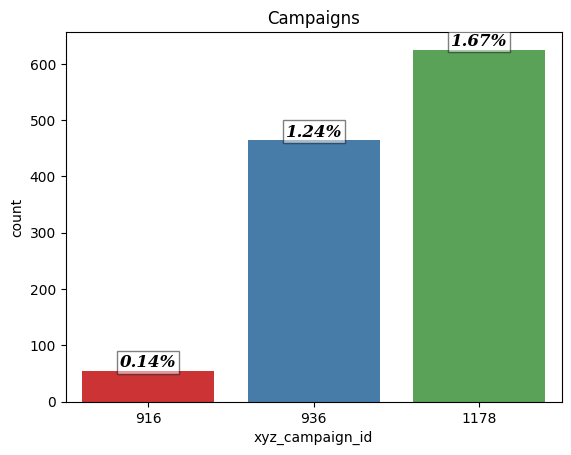

In [8]:
ax=sns.countplot(x='xyz_campaign_id',data=df,palette='Set1')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.05, f'{height/sum(df["interest"])*100:.2f}%', ha='center',fontsize=12,weight='bold',color='black',rotation=0,va='bottom',alpha=1,fontstyle='italic',fontdict={'family':'serif'},bbox={'facecolor':'white','alpha':0.5,'pad':2,'edgecolor':'black'},zorder=10,clip_on=True)
plt.title('Campaigns')
plt.show()

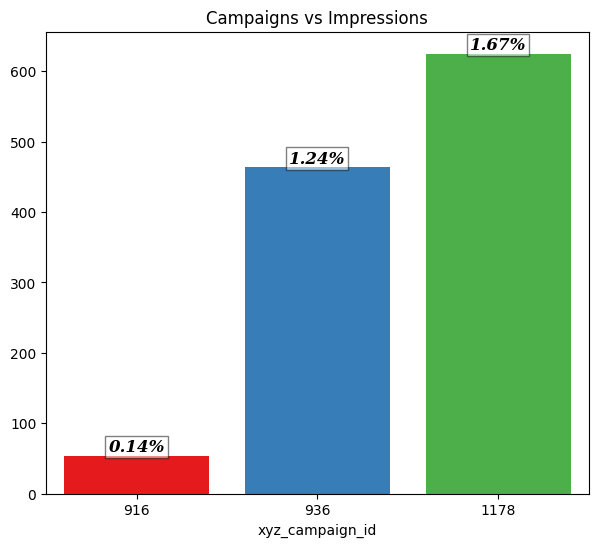

In [9]:
dt=df.groupby(by=('xyz_campaign_id'))['Impressions'].count()
figsize=(7,6)
ax=sns.barplot(x=dt.index,y=dt.values,palette='Set1',ci=None,orient='v',saturation=1,linewidth=1.5,dodge=True,figure=plt.figure(figsize=figsize))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.05, f'{height/sum(df["interest"])*100:.2f}%', ha='center',fontsize=12,weight='bold',color='black',rotation=0,va='bottom',alpha=1,fontstyle='italic',fontdict={'family':'serif'},bbox={'facecolor':'white','alpha':0.5,'pad':2,'edgecolor':'black'},zorder=10,clip_on=True)
plt.title('Campaigns vs Impressions')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


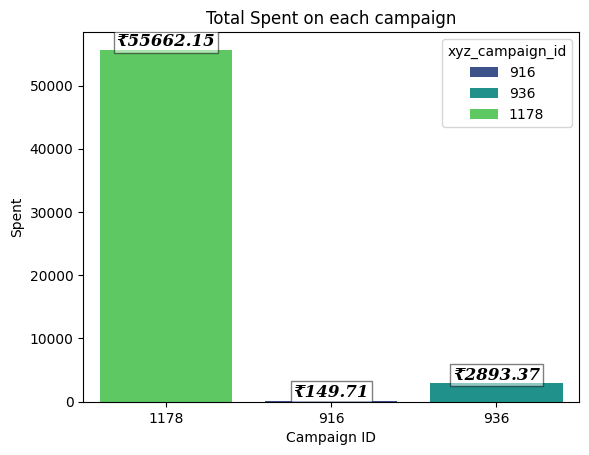

In [10]:
dt = df.groupby('xyz_campaign_id')['Spent'].sum().reset_index()

ax = sns.barplot(x='xyz_campaign_id', y='Spent', data=dt, palette='viridis', hue='xyz_campaign_id', dodge=False, ci=None, orient='v', saturation=1, order=[1178, 916, 936], linewidth=1.5)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 5, f'₹{height:.2f}', ha='center',fontsize=12,weight='bold',color='black',rotation=0,va='bottom',alpha=1,fontstyle='italic',fontdict={'family':'serif'},bbox={'facecolor':'white','alpha':0.5,'pad':2,'edgecolor':'black'},zorder=10,clip_on=True)

plt.title('Total Spent on each campaign')
plt.xlabel('Campaign ID')
plt.ylabel('Spent')
plt.show()


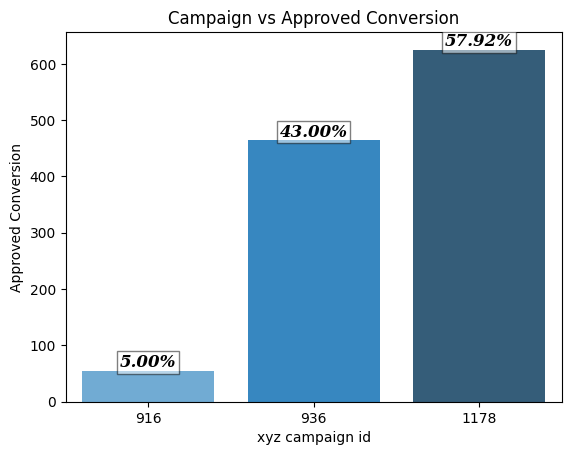

In [11]:
dt=df.groupby(by=('xyz_campaign_id'))['Approved_Conversion'].count()
ax = sns.barplot(x=dt.index, y=dt.values, palette="Blues_d", saturation=1,linewidth=5,ci=None,orient='v',dodge=True)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.05, f'{height/sum(df["Approved_Conversion"])*100:.2f}%', ha='center',fontsize=12,weight='bold',color='black',rotation=0,va='bottom',alpha=1,fontstyle='italic',fontdict={'family':'serif'},bbox={'facecolor':'white','alpha':0.5,'pad':2,'edgecolor':'black'},zorder=10,clip_on=True)
plt.xlabel('xyz campaign id')
plt.ylabel('Approved Conversion')
plt.title('Campaign vs Approved Conversion')
    
plt.show()

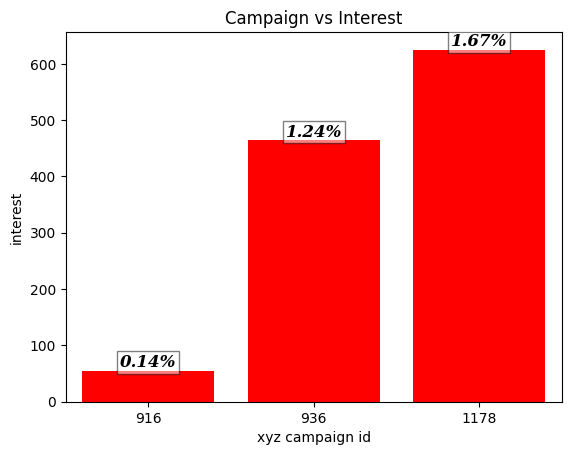

In [12]:
dt=df.groupby(by=('xyz_campaign_id'))['interest'].count()
ax=sns.barplot(x=dt.index, y=dt.values, color="red", saturation=1,linewidth=5,ci=None,orient='v',dodge=True)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.05, f'{height/sum(df["interest"])*100:.2f}%', ha='center',fontsize=12,weight='bold',color='black',rotation=0,va='bottom',alpha=1,fontstyle='italic',fontdict={'family':'serif'},bbox={'facecolor':'white','alpha':0.5,'pad':2,'edgecolor':'black'},zorder=10,clip_on=True)
plt.xlabel('xyz campaign id')
plt.ylabel('interest')
plt.title('Campaign vs Interest')
plt.show()

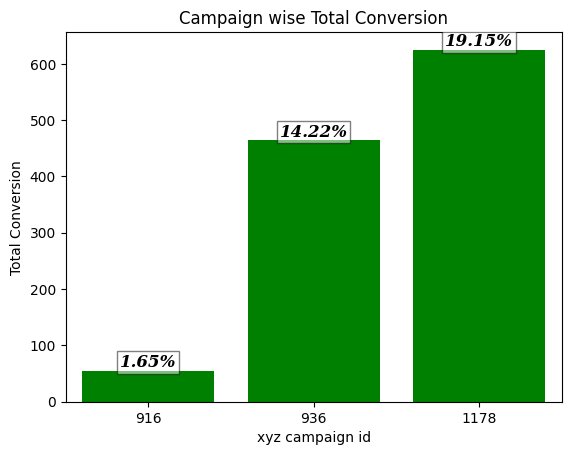

In [13]:
#plot campaign vs total conversion
dt=df.groupby(by=('xyz_campaign_id'))['Total_Conversion'].count()
ax=sns.barplot(x=dt.index, y=dt.values, color="green", saturation=1,linewidth=5,ci=None,orient='v',dodge=True)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.05, f'{height/sum(df["Total_Conversion"])*100:.2f}%', ha='center',fontsize=12,weight='bold',color='black',rotation=0,va='bottom',alpha=1,fontstyle='italic',fontdict={'family':'serif'},bbox={'facecolor':'white','alpha':0.5,'pad':2,'edgecolor':'black'},zorder=10,clip_on=True)
plt.xlabel('xyz campaign id')
plt.ylabel('Total Conversion')
plt.title('Campaign wise Total Conversion')
plt.show()

### No surprises here, Campaign 1178 has the highest ad spend and highest conversions which is consistent with its high impressions in the previous chart

In [14]:
group_by_age = df.groupby('age').sum().drop(['gender','ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'interest'], axis = 1)

In [15]:
group_by_age.reset_index(inplace=True)
group_by_age

,age,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,30-34,67993019,9483,15252.399986,1431,494
1,35-39,42104644,7094,11112.429994,626,207
2,40-44,39604307,7736,11589.729981,523,170
3,45-49,63732858,13852,20750.669997,684,208


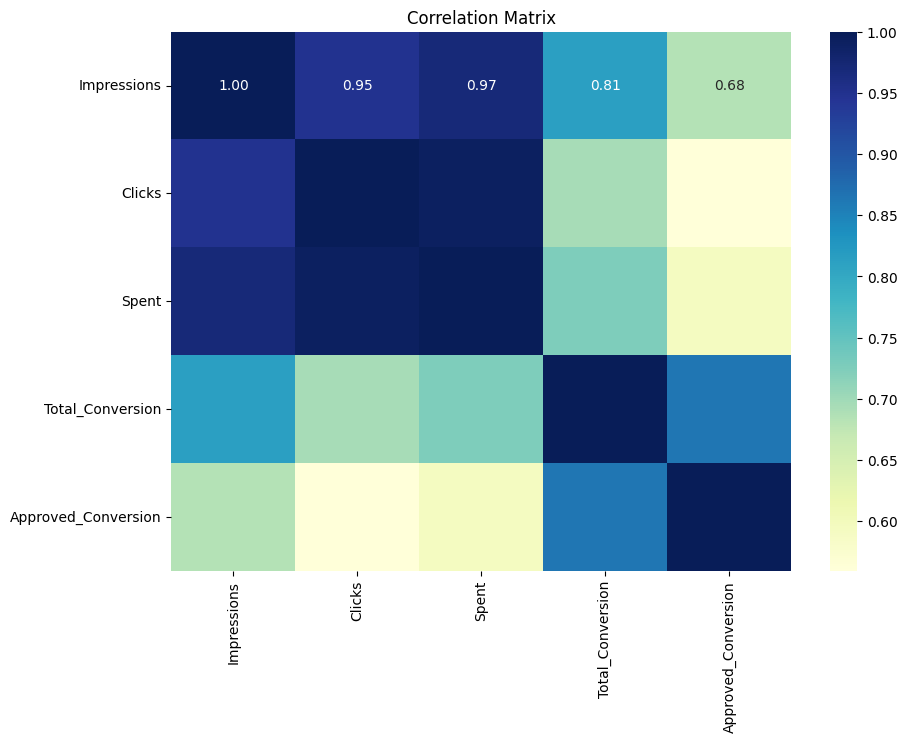

In [16]:
cols = ['Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion']
corr_matrix = df[cols].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

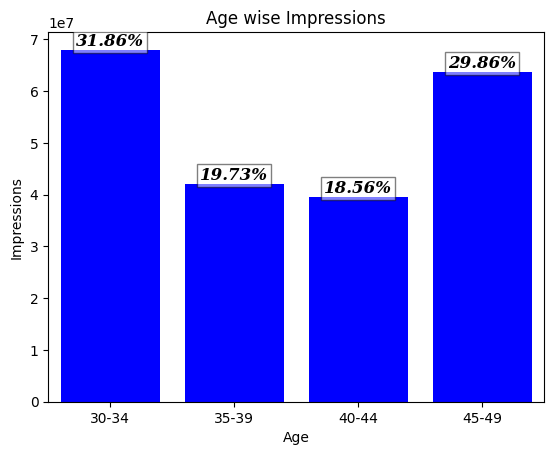

In [17]:
ax=sns.barplot(x='age', y='Impressions', data=group_by_age, color="blue", saturation=1,linewidth=5)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.05, f'{height/sum(df["Impressions"])*100:.2f}%', ha='center',fontsize=12,weight='bold',color='black',rotation=0,va='bottom',alpha=1,fontstyle='italic',fontdict={'family':'serif'},bbox={'facecolor':'white','alpha':0.5,'pad':2,'edgecolor':'black'},zorder=10,clip_on=True)
plt.title('Age wise Impressions')
plt.xlabel('Age')
plt.ylabel('Impressions')
plt.show()

### As for the number of impression, one for age group 30 to 34 was the highest.
- The impressions for the audience aged 45 to 49 was almost as high as one for 30 to 34 although the number of ads run was much lower.

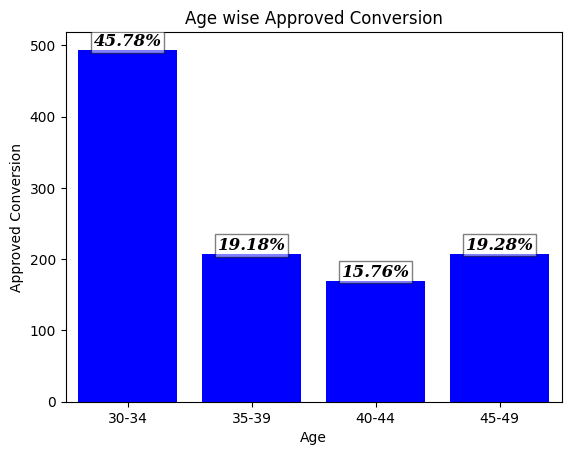

In [18]:
ax=sns.barplot(x='age', y='Approved_Conversion', data=group_by_age, color="blue", saturation=1,linewidth=5)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.05, f'{height/sum(df["Approved_Conversion"])*100:.2f}%', ha='center',fontsize=12,weight='bold',color='black',rotation=0,va='bottom',alpha=1,fontstyle='italic',fontdict={'family':'serif'},bbox={'facecolor':'white','alpha':0.5,'pad':2,'edgecolor':'black'},zorder=10,clip_on=True)
plt.title('Age wise Approved Conversion')
plt.xlabel('Age')
plt.ylabel('Approved Conversion')
plt.show()

### Age group 30-34 has the highest "Approved_Conversion" rate in campaign id-(1178, 936) but in campaign id-916 40 to 44 age group's peole has higher rate of conversion.

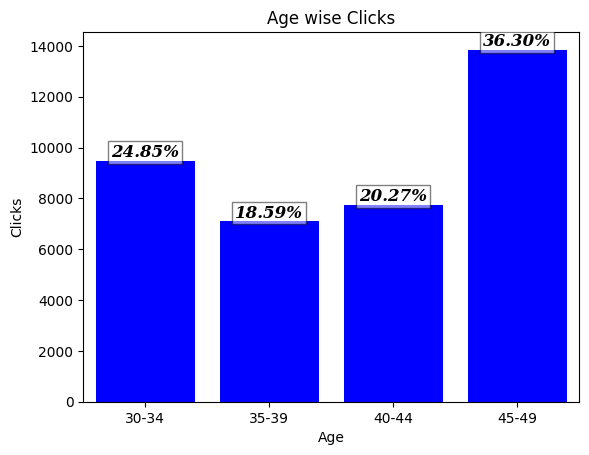

In [19]:
ax=sns.barplot(x='age',y='Clicks',data=group_by_age, color="blue", saturation=1,linewidth=5)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.05, f'{height/sum(df["Clicks"])*100:.2f}%', ha='center',fontsize=12,weight='bold',color='black',rotation=0,va='bottom',alpha=1,fontstyle='italic',fontdict={'family':'serif'},bbox={'facecolor':'white','alpha':0.5,'pad':2,'edgecolor':'black'},zorder=10,clip_on=True)
plt.title('Age wise Clicks')
plt.xlabel('Age')
plt.ylabel('Clicks')
plt.show()

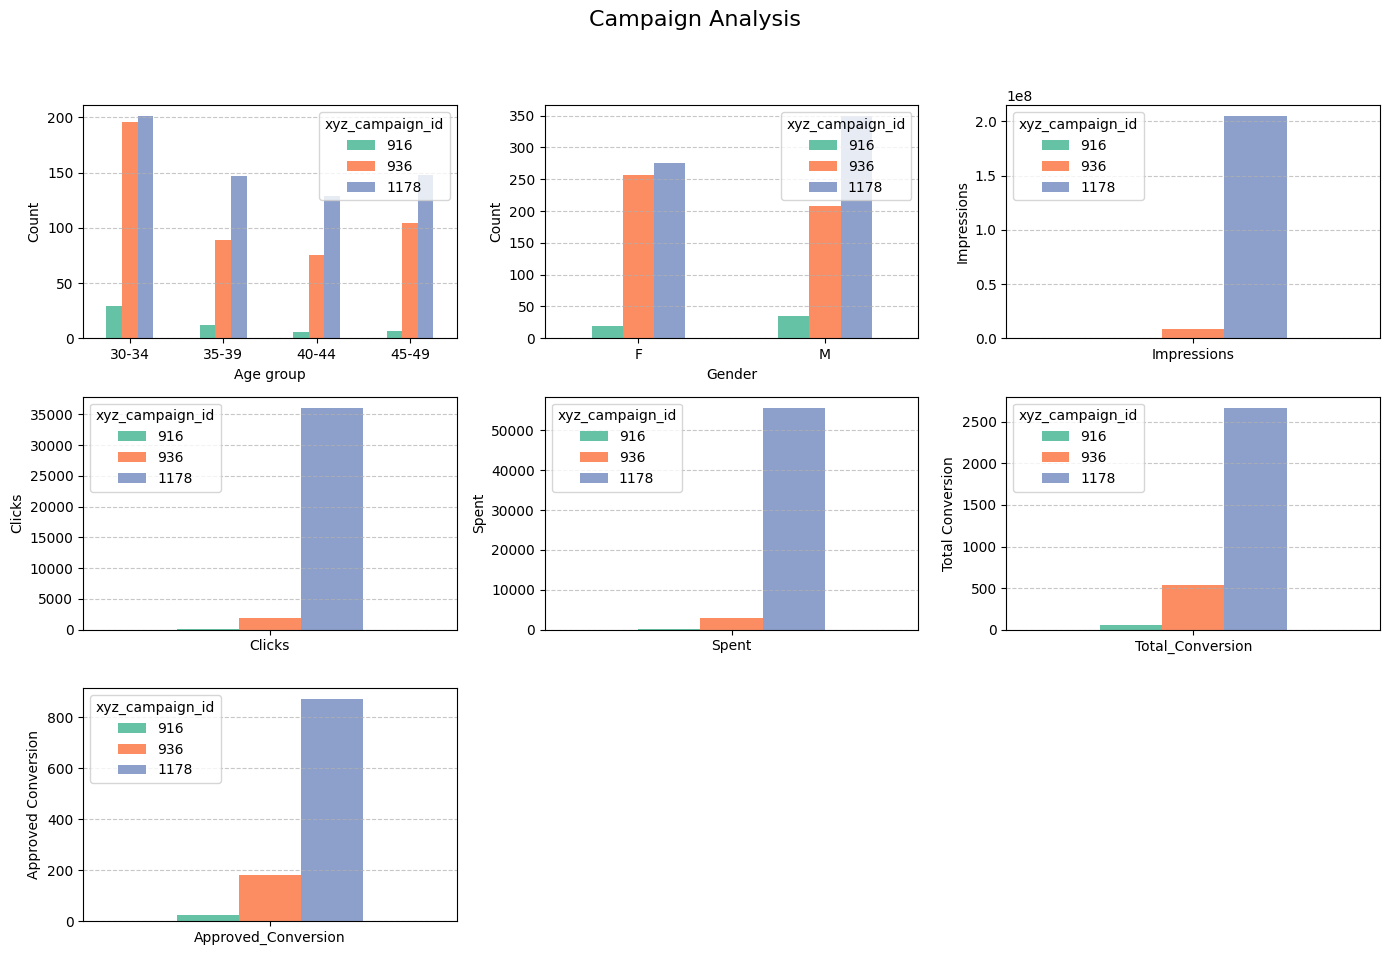

In [20]:
colors = sns.color_palette("Set2")

fig, ax = plt.subplots(3, 3, figsize=(14, 10))
fig.suptitle("Campaign Analysis", fontsize=16)

# Subplot 1
df[["age", "xyz_campaign_id"]].pivot_table(index="age", columns="xyz_campaign_id", aggfunc=len, fill_value=0).plot(kind="bar", ax=ax[0, 0], color=colors)
ax[0, 0].tick_params(labelrotation=0)
ax[0, 0].set_xlabel("Age group")
ax[0, 0].set_ylabel("Count")
ax[0, 0].grid(axis="y", linestyle="--", alpha=0.7)

# Subplot 2
df[["gender", "xyz_campaign_id"]].pivot_table(index="gender", columns="xyz_campaign_id", aggfunc=len, fill_value=0).plot(kind="bar", ax=ax[0, 1], color=colors)
ax[0, 1].tick_params(labelrotation=0)
ax[0, 1].set_xlabel("Gender")
ax[0, 1].set_ylabel("Count")
ax[0, 1].grid(axis="y", linestyle="--", alpha=0.7)

# Subplot 3
df[["xyz_campaign_id", "Impressions"]].pivot_table(columns="xyz_campaign_id", values="Impressions", aggfunc=sum).plot(kind="bar", ax=ax[0, 2], color=colors)
ax[0, 2].tick_params(labelrotation=0)
ax[0, 2].set_ylabel("Impressions")
ax[0, 2].grid(axis="y", linestyle="--", alpha=0.7)

# Subplot 4
df[["xyz_campaign_id", "Clicks"]].pivot_table(columns="xyz_campaign_id", values="Clicks", aggfunc=sum).plot(kind="bar", ax=ax[1, 0], color=colors)
ax[1, 0].tick_params(labelrotation=0)
ax[1, 0].set_ylabel("Clicks")
ax[1, 0].grid(axis="y", linestyle="--", alpha=0.7)

# Subplot 5
df[["xyz_campaign_id", "Spent"]].pivot_table(columns="xyz_campaign_id", values="Spent", aggfunc=sum).plot(kind="bar", ax=ax[1, 1], color=colors)
ax[1, 1].tick_params(labelrotation=0)
ax[1, 1].set_ylabel("Spent")
ax[1, 1].grid(axis="y", linestyle="--", alpha=0.7)

# Subplot 6
df[["xyz_campaign_id", "Total_Conversion"]].pivot_table(columns="xyz_campaign_id", values="Total_Conversion", aggfunc=sum).plot(kind="bar", ax=ax[1, 2], color=colors)
ax[1, 2].tick_params(labelrotation=0)
ax[1, 2].set_ylabel("Total Conversion")
ax[1, 2].grid(axis="y", linestyle="--", alpha=0.7)

# Subplot 7
df[["xyz_campaign_id", "Approved_Conversion"]].pivot_table(columns="xyz_campaign_id", values="Approved_Conversion", aggfunc=sum).plot(kind="bar", ax=ax[2, 0], color=colors)
ax[2, 0].tick_params(labelrotation=0)
ax[2, 0].set_ylabel("Approved Conversion")
ax[2, 0].grid(axis="y", linestyle="--", alpha=0.7)

# Subplot 8
ax[2, 1].axis('off')
ax[2, 2].axis('off')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()


## We can get the following broad conclusions from the bar plots:

- Ages 30-34 are the primary target audience for all three ads. The audience for campaign 936 is predominately female, but the audiences for the other two campaigns are mainly masculine.

- In terms of impressions, clicks, conversion, and investment (spending), Campaign 1178 outperforms the other two campaigns. This is to be expected, since previous research has demonstrated the significant correlation between these variables: a larger campaign expenditure translates into a larger audience reach, which in turn generates more clicks and conversions.

- Campaign 1178 clearly performs better than its competitors, as evidenced by notably greater conversion and engagement rates. But as we recall, this is most likely the result of the company's much higher spending on campaign 1178 (more than 45,000 USD compared to 936, and more than 50,000 USD compared to 916); we are unsure, however, whether the other campaigns would achieve the same, or even better, outcomes if they received the same amount of funding. Thus, it wouldn't be prudent to assume that 1178 is more efficient right away.

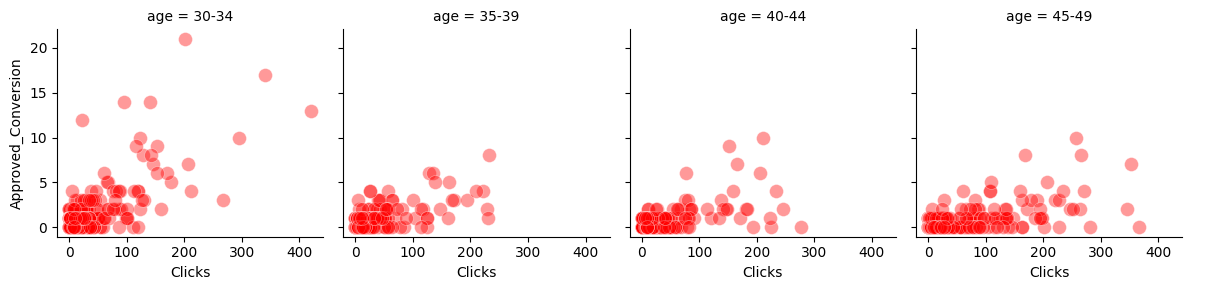

In [21]:
c = sns.FacetGrid(df, col="age")
c.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4, s=100, lw=.5, edgecolor="white", color="red")
c.add_legend()

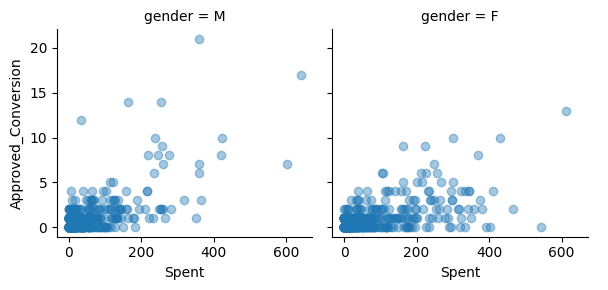

In [22]:
dt = sns.FacetGrid(df, col="gender")
dt.map(plt.scatter, "Spent", "Approved_Conversion", alpha=.4)
dt.add_legend()

Text(0.5, 1.0, 'Average spending based on gender')

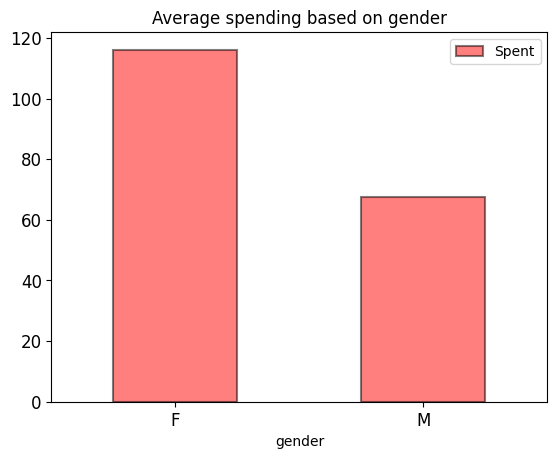

In [44]:
df1=df[df['xyz_campaign_id']==1178]

df1.groupby('gender')['Spent'].agg('mean').plot(kind='bar',color='red',rot=0,alpha=0.5,edgecolor='black',linewidth=1.5,fontsize=12,legend=True)
plt.xticks(rotation=0)
plt.title('Average spending based on gender')

Text(0.5, 1.0, 'Average approved conversions based on age')

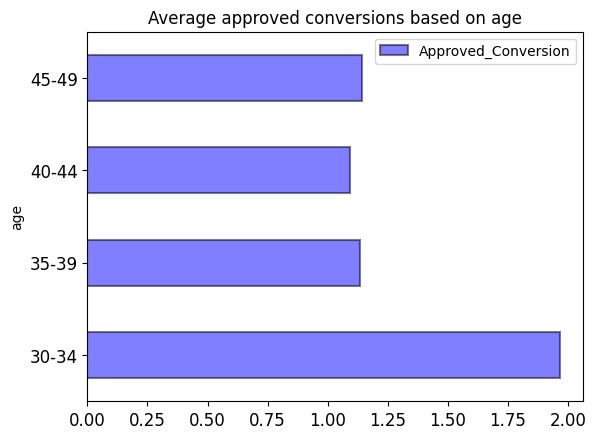

In [45]:
df1.groupby('age')['Approved_Conversion'].agg('mean').plot(kind='barh',color='blue',rot=0,alpha=0.5,edgecolor='black',linewidth=1.5,fontsize=12,legend=True)
plt.title('Average approved conversions based on age')


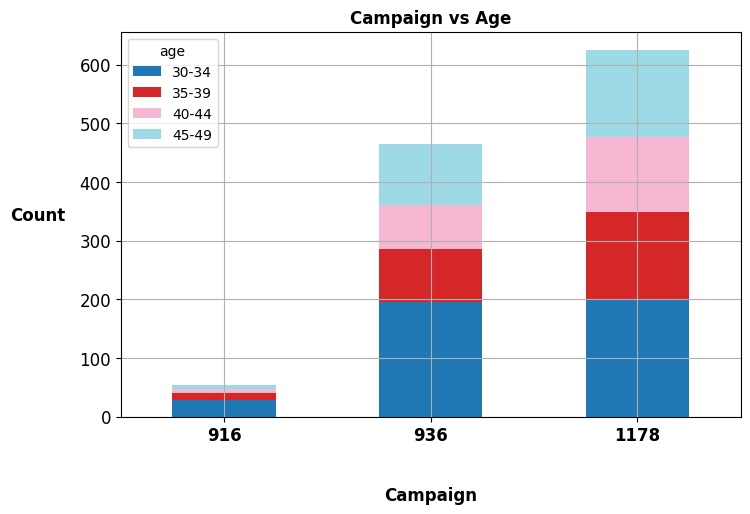

In [39]:
dt=df.groupby(by=['xyz_campaign_id'])['age'].value_counts()
ax = dt.unstack().plot(kind='bar',figsize=(8,5),stacked=True,rot=0,legend=True,fontsize=12,grid=True,colormap='tab20')
plt.xticks(rotation=0,fontsize=12,fontweight='bold')
ax.set_ylabel('Count',fontsize=12,rotation=0,labelpad=30,fontweight='bold')
ax.set_xlabel('Campaign',fontsize=12,rotation=0,labelpad=30,fontweight='bold')
plt.title('Campaign vs Age',fontsize=12,fontweight='bold')
plt.show()

### The dataset comprised the most ads targeted audience aged 30 to 34.

# Insights

### Correlations:

- "Impressions" and "Total_Conversion" are more correlated with "Approved_Conversion" than "Clicks" and "Spent".

### Campaign_1178:
- This campaign has the most advertisements.
- The Approved_conversion count of compaign_1178 is higher, meaning that more consumers purchased goods from campaign_c.

### Age_group:
- The 30-34 age group shows higher interest in campaigns 1178 and 936, whereas the 40-44 age group shows more interest in campaign 916.

### Gender:
- In all three campaigns, both genders exhibit comparable interests.

### Money spent:
- The quantity of products purchased does not grow when money is spent.
- After a given number of Impressions, there is an abrupt increase in the Approved_Conversion.

### Product bought after clicking the ad:
- Upon clicking the advertisement, women purchase a greater number of things than men, despite it appearing that men click more frequently.
- Ages 30-34 have a higher propensity to purchase a product after seeing an advertisement.

### Product bought after enquiring the ad:
- It appears that after inquiring about the goods, women purchase more than men do. Men, however, usually ask more questions regarding the goods.
- Ages 30-34 appear to have a higher likelihood of purchasing the product after learning more about it.

# Business Questions 

### 1)How to optimize the social ad campaigns for the highest conversion rate possible. (Attain best Reach to Conversion ratios/Click to Conversion ratios)

Since highest conversion rate was attained in campaign_1178, we can consider the factors contributed in this campaign:

- The number of ad counts should be more for better reach.
- The age group of 30-34 should be the main aim.
- People with interest types after 100 should be given more attention
- More the number of times the add is shown i.e. "impression", more approved_conversion rate is achieved.

### 2)Finding the perfect target demographics with the appropriate clickthrough rates

- Women tend to buy the product more often after clicking the ad than men.
- Also the age group 30 to 34 buy the product more often after clicking the ad

### 3)Understanding the ideal turnaround/decision making time per age group to convert and retarget future social campaigns

- Age group 30-34 tend to take less decision making time followed by 35 to 39 and 40-44.
- Age group 45-49 take the most time to decide.

### 4)Comparing the individual campaign performance so the best creative/campaign can be run again with adjusted audiences.

- Clearly campaign 1178 wins the battle due to highest approved_conversion rate.
- Also campaig 916 does pretty well , considering the number of ads it involves. With less no of ads, it has managed to peform better than campaign 936 with large no of ads.